In [93]:
import pandas as pd
import seaborn as sns

In [94]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [95]:
from collections import Counter, defaultdict

In [96]:
sunstick_df = pd.read_csv("./crawling/data/sunstick_review_token.csv",encoding ="utf-8")

In [97]:
suncushion_df = pd.read_csv("./crawling/data/suncushion_review_token.csv", encoding = "utf-8")

In [98]:
from tqdm.notebook import tqdm

tqdm.pandas()
sunstick_df['tokens'] = sunstick_df['tokens'].progress_apply(lambda x: eval(x))
suncushion_df['tokens'] = suncushion_df['tokens'].progress_apply(lambda x: eval(x))

  0%|          | 0/25743 [00:00<?, ?it/s]

  0%|          | 0/14358 [00:00<?, ?it/s]

In [99]:
sunstick_word_count_dict = defaultdict(Counter)
suncushion_word_count_dict = defaultdict(Counter)

In [100]:
def sunstick_count_words(df):
    for review in df:
        c = Counter([x for x in review])
        sunstick_word_count_dict['sunstick'] += c

In [101]:
sunstick_count_words(sunstick_df['tokens'])

In [102]:
def suncushion_count_words(df):
    for review in df:
        c = Counter([x for x in review])
        suncushion_word_count_dict['suncushion'] += c

In [103]:
suncushion_count_words(suncushion_df['tokens'])

In [104]:
sunstick_word_count_dict

defaultdict(collections.Counter,
            {'sunstick': Counter({'피부': 6376,
                      '보송': 5694,
                      '얼굴': 5082,
                      '여름': 4748,
                      '스틱': 4570,
                      '발림성': 3920,
                      '만족': 3291,
                      '추천': 2811,
                      '뽀송': 2725,
                      '자외선': 2636,
                      '촉촉': 2605,
                      '차단': 2377,
                      '휴대': 2323,
                      '간편': 2282,
                      '자극': 2163,
                      '발라': 2145,
                      '쿨링감': 2110,
                      '덧바르': 2106,
                      '편해': 2043,
                      '화장': 1925,
                      '백탁': 1818,
                      '효과': 1807,
                      '정도': 1767,
                      '처음': 1766,
                      '가격': 1700,
                      '좋아서': 1645,
                      '재구매': 1632,
                      '성분': 159

In [105]:
suncushion_word_count_dict

defaultdict(collections.Counter,
            {'suncushion': Counter({'피부': 6716,
                      '톤업': 5001,
                      '쿠션': 4037,
                      '촉촉': 2568,
                      '얼굴': 2423,
                      '여름': 2273,
                      '화장': 2260,
                      '자연': 2193,
                      '퍼프': 2082,
                      '팩트': 1719,
                      '만족': 1702,
                      '추천': 1317,
                      '쿨링감': 1307,
                      '정도': 1291,
                      '덧바르': 1290,
                      '리필': 1235,
                      '효과': 1203,
                      '자외선': 1167,
                      '처음': 1081,
                      '시간': 1077,
                      '백탁': 1060,
                      '건조': 1007,
                      '커버': 992,
                      '차단': 991,
                      '재구매': 918,
                      '무기자차': 900,
                      '발림성': 883,
                      '썬쿠션': 865,

In [106]:
sunstick_word_cloud = WordCloud(
    font_path = "/Library/Fonts/NanumGothic.otf",
    background_color="white",
    colormap="brg",
).generate_from_frequencies(sunstick_word_count_dict["sunstick"])

suncushion_word_cloud = WordCloud(
    font_path = "/Library/Fonts/NanumGothic.otf",
    background_color="white",
    colormap="brg",
).generate_from_frequencies(suncushion_word_count_dict["suncushion"])

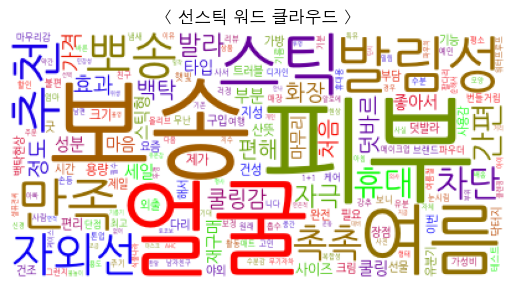

In [108]:
plt.title("< 선스틱 워드 클라우드 >")
plt.imshow(sunstick_word_cloud)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.box(False)

# 선스틱

In [89]:
c = list(sunstick_word_count_dict.values())
d = list(c[0].items())
d = sorted(d, key = lambda x: x[0:][1], reverse = True)
data = d[:7]

names = []
valuess = []

for i in range(len(data)):
    names.append(data[i][0])
    valuess.append(data[i][1])

In [90]:
names, valuess

(['피부', '보송', '얼굴', '여름', '스틱', '발림성', '만족'],
 [6376, 5694, 5082, 4748, 4570, 3920, 3291])

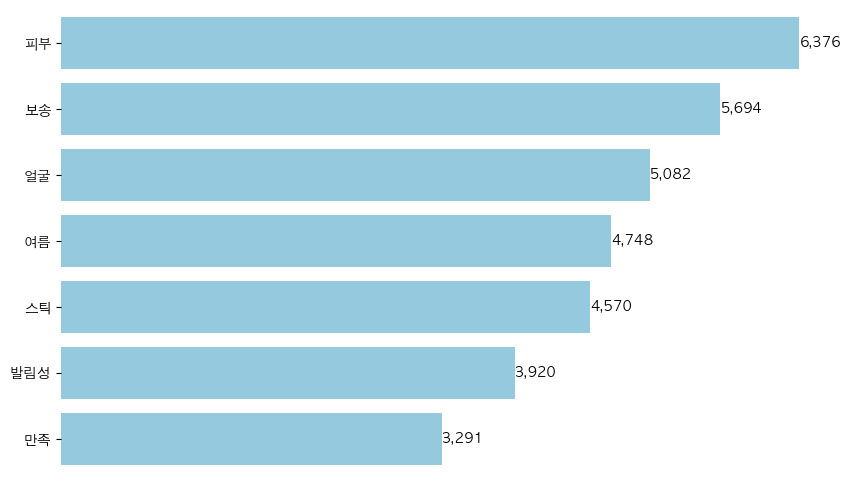

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x = valuess, y= names, color='skyblue')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])

# 값 표시
for index, value in enumerate(valuess):
    plt.text(value, index, f'{value:,}', va='center')

plt.box(False)

plt.show()

# 선쿠션 워드클라우드

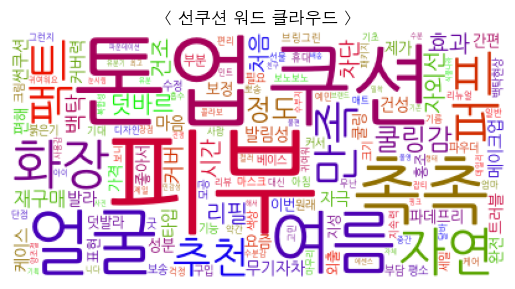

In [109]:
plt.title("< 선쿠션 워드 클라우드 >")
plt.imshow(suncushion_word_cloud)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.box(False)

## 선쿠션

In [42]:
a = list(suncushion_word_count_dict.values())

In [43]:
b = list(a[0].items())

In [49]:
b = sorted(b, key = lambda x: x[0:][1], reverse = True)

In [53]:
data = b[:7]

In [72]:
name = []
values = []

for i in range(len(data)):
    name.append(data[i][0])
    values.append(data[i][1])

In [73]:
name, values

(['피부', '톤업', '쿠션', '촉촉', '얼굴', '여름', '화장'],
 [6716, 5001, 4037, 2568, 2423, 2273, 2260])

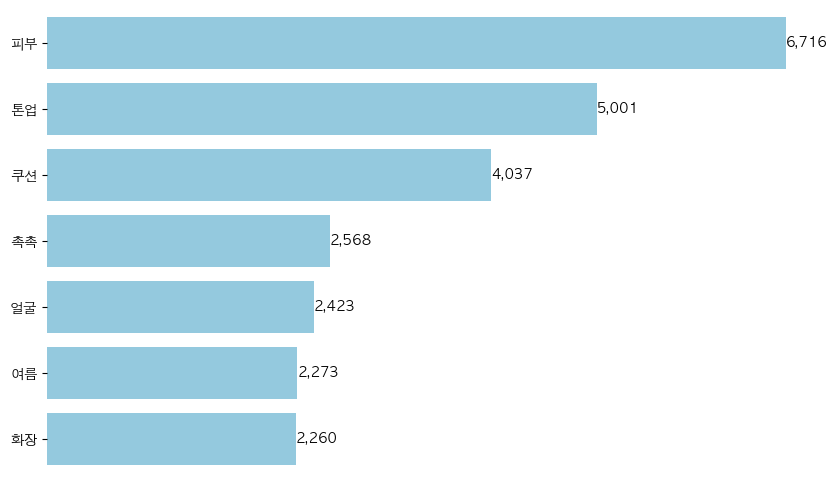

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x = values, y= name, color='skyblue')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])

# 값 표시
for index, value in enumerate(values):
    plt.text(value, index, f'{value:,}', va='center')

plt.box(False)

plt.show()